# Parkinson's Disease Classification
The students should perform a statistical analysis of the datasets in advance and summarize relevant implications in the report, such as the underlying distributions and hypothesized forms feature dependency.
## Preprocessing
In accordance with the properties of the input dataset and the behavior of the target learning algorithm, the
students are allowed to apply preprocessing techniques when needed or under a solid conjecture of its potential
impact on learning.

## Data Set Information
The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9) at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82 (61.1Â±8.9). During the data collection process, the microphone is set to 44.1 KHz and following the physicianâ€™s examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions.

## Attribute Information
Various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

# Data analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Read the dataset and skip the first row
df = pd.read_csv("dataset/pd_speech_features.csv", skiprows=1)

In [14]:
# Describe the dataset
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [15]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


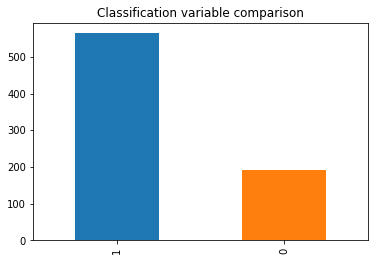

In [157]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Classification variable comparison")
plt.show()

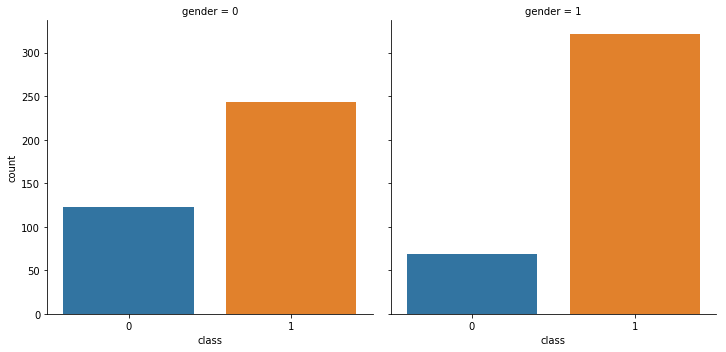

In [169]:
import seaborn as sns

# How does the parkinsons disease depend on the gender?
plot = sns.catplot(x="class", col="gender", data=df, kind="count")

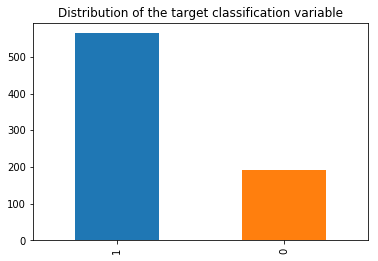

In [177]:
fig, ax = plt.subplots()
fig = df["class"].value_counts().plot(kind="bar", ax=ax)
ax.set_title("Distribution of the target classification variable")
plt.show()

# Train test split
Data will be split 65% train, 20% test, 15% validation

In [43]:
train_size = 0.65
test_size = 0.20
valid_size = 0.15

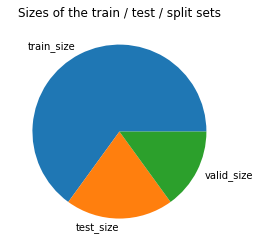

In [153]:
# Visualise the train/test/split ☺️
fig, ax = plt.subplots()
plt.pie([train_size, test_size, valid_size], labels=["train_size", "test_size", "valid_size"])
ax.set_title("Sizes of the train / test / split sets")
plt.show()

In [44]:
X = df.drop(columns=["class"])
y = df["class"]

# Train / Test / Validation
We will be using cross valdation instead of the test dataset

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_merge, X_valid, y_merge, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_merge, y_merge, test_size=0.15, random_state=42)

# Model training

#### RandomForestClassifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

grid = {'max_features' : np.arange(1, 10, 1),
        'n_estimators' : np.arange(1, 15, 1),
        'max_depth': np.arange(1, 10, 1)
       }

randf = GridSearchCV(RandomForestClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
print("RandomForestClassifier best score: {} for {}.".format(randf.best_score_.mean(), randf.best_params_))

Fitting 5 folds for each of 1134 candidates, totalling 5670 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 1068 tasks      | elapsed:    5.7s
[Parallel(n_jobs=8)]: Done 3068 tasks      | elapsed:   13.6s


RandomForestClassifier best score: 0.8582554517133957 for {'max_depth': 8, 'max_features': 9, 'n_estimators': 12}.


[Parallel(n_jobs=8)]: Done 5670 out of 5670 | elapsed:   25.4s finished


#### KNeighborsClassifier

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'n_neighbors': np.arange(1, 15),
        'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
        'weights': ["uniform", "distance"],
        'leaf_size': np.arange(2, 40, 5)
       }

knnclas = GridSearchCV(KNeighborsClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
print("KNeighborsClassifier best score: {} for {}.".format(knnclas.best_score_, knnclas.best_params_))

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 896 candidates, totalling 4480 fits


[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 1648 tasks      | elapsed:   12.8s
[Parallel(n_jobs=8)]: Done 3448 tasks      | elapsed:   25.4s


KNeighborsClassifier best score: 0.7679127725856698 for {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}.


[Parallel(n_jobs=8)]: Done 4480 out of 4480 | elapsed:   29.4s finished


#### DecisionTreeClassifier

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

grid = {'criterion': ['gini'],
        'min_samples_split' : np.arange(3, 30, 2),
        'min_samples_leaf' : np.arange(3, 12, 1),
        'max_depth': np.arange(4, 12, 1)
       }

dtc = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, verbose=1, n_jobs=8).fit(X_merge, y_merge)
print("DecisionTreeClassifier best score: {} for {}.".format(dtc.best_score_.mean(), dtc.best_params_))

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   11.1s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   20.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   33.8s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   53.3s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  1.3min


KeyboardInterrupt: 

#### GaussianNB

In [136]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gaus = GaussianNB()
print("GaussianNB score: {}".format(cross_val_score(gaus, X_merge, y_merge, cv=5, verbose=1, n_jobs=8).mean()))

# fit for future testing
gaus.fit(X_merge, y_merge)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s


GaussianNB score: 0.752313468992248


[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:    0.8s finished


GaussianNB(priors=None, var_smoothing=1e-09)

#### LogisticRegression
kinda sucks for high dimensional inputs

## Select the best classifier